INFO:rootpy.plotting.style:using ROOT style 'ATLAS'


specify style parameters with --name=value
Invalid style: `/Users/danielbrandenburg/.ipython/profile_daniel/security/kernel-a51f5ee0-8e93-4b9f-b9f8-40215de78817.json`. Using the `ATLAS` style.


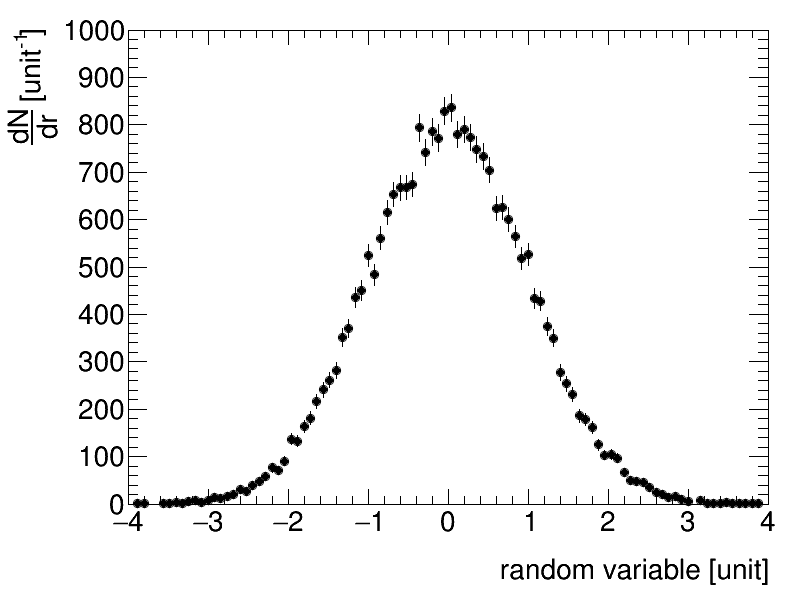

In [23]:
from rootpy.extern.argparse import ArgumentParser

parser = ArgumentParser()
parser.add_argument('style', default='ATLAS', nargs='?')
args, extra = parser.parse_known_args()

import ROOT
from rootpy.plotting import Canvas, Hist
from rootpy.plotting.style import get_style
from rootpy.interactive import wait

try:
    kwargs = {}
    for arg in extra:
        name, value = arg.lstrip('--').split('=')
        kwargs[name] = value
except ValueError:
    print("specify style parameters with --name=value")

try:
    style = get_style(args.style, **kwargs)
except ValueError:
    print('Invalid style: `{0}`. Using the `ATLAS` style.'.format(args.style))
    style = get_style('ATLAS')

# Use styles as context managers. The selected style will only apply
# within the following context:
with style:
    c = Canvas(width=800)
    hpx = Hist(100, -4, 4, name="hpx", title="This is the px distribution")
    # generate some random data
    ROOT.gRandom.SetSeed()
    for i in xrange(25000):
        hpx.Fill(ROOT.gRandom.Gaus())
    hpx.GetXaxis().SetTitle("random variable [unit]")
    hpx.GetYaxis().SetTitle("#frac{dN}{dr} [unit^{-1}]")
    hpx.SetMaximum(1000.)
    hpx.Draw()

c